<a href="https://colab.research.google.com/github/angelostefanini/data_analytics/blob/main/Course_3_Waze_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Title: **Exploratory Data Analysis for Waze Project **testo in grassetto**

**Introduction:**
This project involves conducting exploratory data analysis (EDA) on a provided dataset from Waze. The primary objective is to thoroughly examine the dataset and prepare it for analysis.

**Objective:**
The main goal of this activity is to delve deeper into the dataset, building upon the initial exploration performed in the previous course. This includes generating insightful visualizations to effectively communicate the narrative conveyed by the data.

- **Your team is making** progress on their project to develop a machine learning model to predict user churn. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

- *We’re ready to perform EDA on our user data. Has May told you what the leadership team expects when it comes to EDA? If not, think of it as a “show your work” kind of report. They will want to see a Python notebook showing the structuring and cleaning you did, and any data visualizations you created to better understand the data. To start, I suggest you create a box plot of the variable “drives,” and a scatter plot of the variables “drives” and “sessions.” Feel free to add any other visuals you think are useful. *

# **Task 1.** Imports and data loading
For EDA of the data, import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a dataframe

df = pd.read_csv("waze_dataset.csv")

***2 - Data overview and summary statistics***

In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
df.shape

(14999, 13)

In [5]:
df.size

194987

In [6]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [8]:
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

It looks like 700 values are missing in the label column. Since this is our output variable, we need to drop those nulls.

In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Use .drop() to remove the ID column since we don't need this information for our analysis

In [11]:
df.drop("ID", axis=1, inplace=True)

Task 3 Visualizations

- Sessions

The number of occurrence of a user opening the app during the month. Box plots are valuable for identifying outliers and understanding the distribution of data points across various continuous numeric variables such as drives and sessions. They provide insights into where the majority of data points are concentrated and help identify any data points that fall outside the typical range, indicating potential outliers.

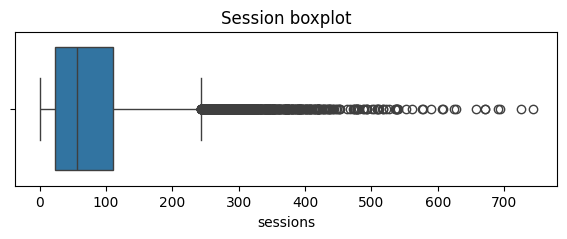

In [12]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['sessions'])
plt.title('Session boxplot')
plt.show()

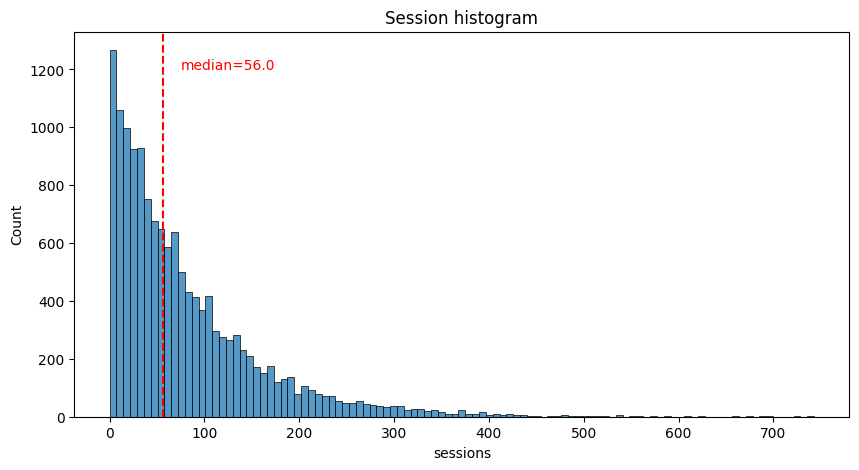

In [13]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x = df['sessions'])
median = df['sessions'].median()
ax.axvline(median, color = 'red', linestyle = '--')
ax.text(75,1200, 'median=56.0', color='red')
plt.title('Session histogram')
plt.show()

- Drives

An occurrence of driving at least 1 km during last month

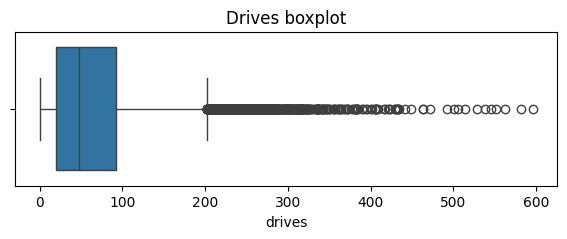

In [14]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['drives'])
plt.title('Drives boxplot')
plt.show()

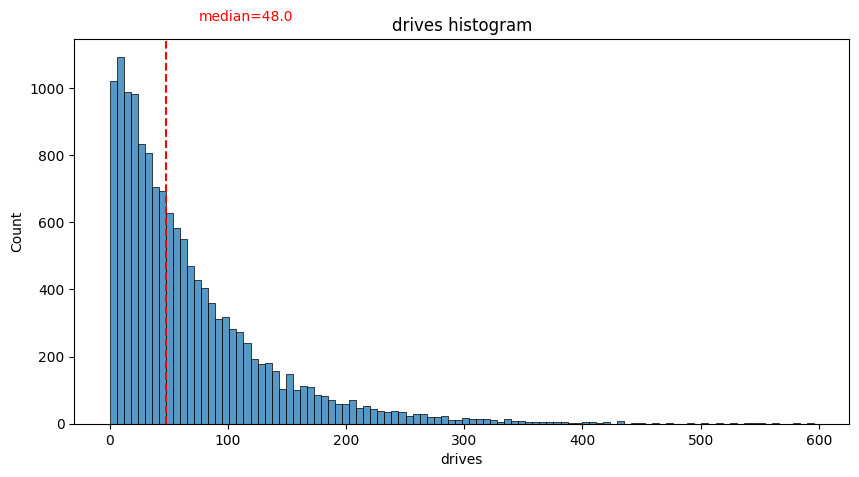

In [15]:
plt.figure(figsize=(10,5))
ax = sns.histplot(x = df['drives'])
median = df['drives'].median()
ax.axvline(median, color = 'red', linestyle = '--')
ax.text(75,1200, 'median=48.0', color='red')
plt.title('drives histogram')
plt.show()


The distribution of the drives information closely resembles that of the sessions variable. It exhibits a right-skewed pattern, roughly resembling a log-normal distribution, with a median of 48. However, it's worth noting that some drivers recorded over 400 drives in the last month.

- ***total_sessions***

A model estimate of the total number of sessions since a user has onboarded

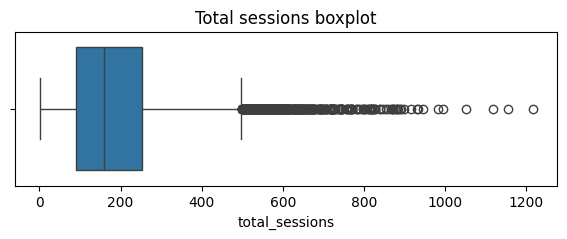

In [16]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['total_sessions'])
plt.title('Total sessions boxplot')
plt.show()

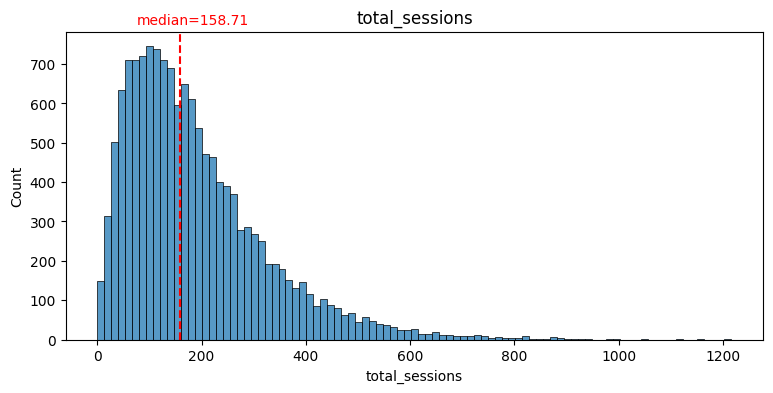

In [17]:
plt.figure(figsize=(9,4))
ax = sns.histplot(x = df['total_sessions'])
median = df['total_sessions'].median()
ax.axvline(median, color = 'red', linestyle = '--')
ax.text(75,800, 'median=158.71', color='red')
plt.title('total_sessions')
plt.show()


The total_sessions variable displays a right-skewed distribution that appears to be more symmetrical compared to the previous variables. The median total number of sessions is 159.6. It's an interesting piece of information because it tells us that by calculating the difference between the median of total sessions and the median of sessions conducted in the last month, we can infer that there has been intense user activity in the last month

- **n_days_after_onboarding**

The number of days since a user signed up for the app

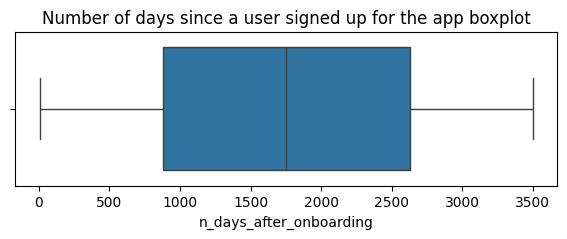

In [18]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['n_days_after_onboarding'])
plt.title('Number of days since a user signed up for the app boxplot')
plt.show()

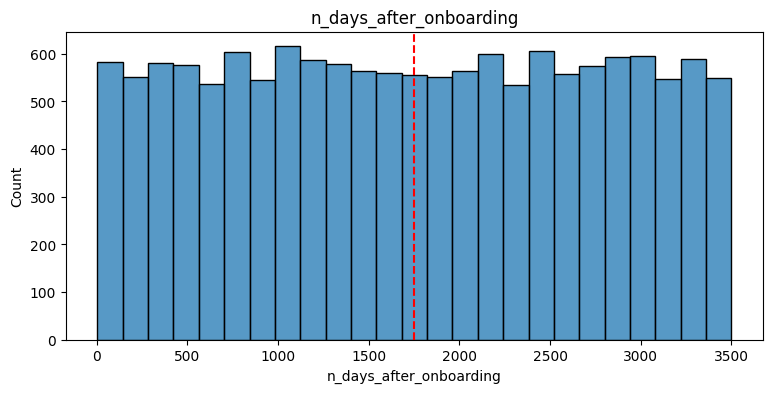

In [19]:
plt.figure(figsize=(9,4))
ax = sns.histplot(x = df['n_days_after_onboarding'])
median = df['n_days_after_onboarding'].median()
ax.axvline(median, color = 'red', linestyle = '--')
plt.title('n_days_after_onboarding')
plt.show()

The total user tenure, which represents the number of days since onboarding, follows a uniform distribution, with values ranging from nearly zero to approximately 3,500 days, equivalent to around 9.5 years.

-** driven_km_drives**

Total kilometers driven during the month

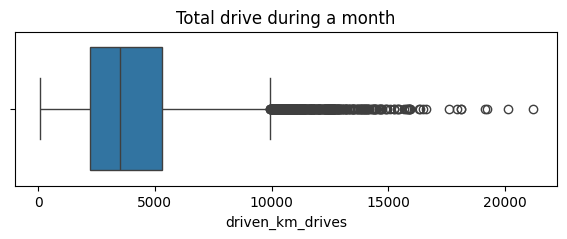

In [20]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['driven_km_drives'])
plt.title('Total drive during a month')
plt.show()

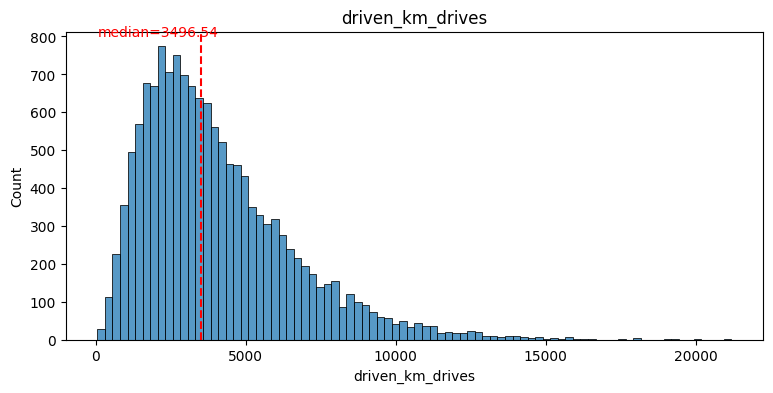

In [21]:
plt.figure(figsize=(9,4))
ax = sns.histplot(x = df['driven_km_drives'])
median = df['driven_km_drives'].median()
ax.axvline(median, color = 'red', linestyle = '--')
ax.text(75,800, 'median=3496.54', color='red')
plt.title('driven_km_drives')
plt.show()


The number of drives conducted per user in the last month exhibits a right-skewed normal distribution, with approximately half of the users driving fewer than 3,495 kilometers. As revealed in the analysis conducted in the previous course, users in this dataset are highly active drivers."

-** duration_minutes_drives**

Total duration driven in minutes during the month

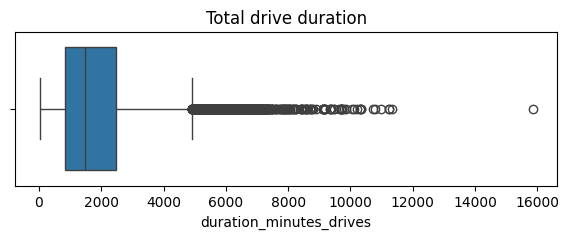

In [22]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['duration_minutes_drives'])
plt.title('Total drive duration')
plt.show()

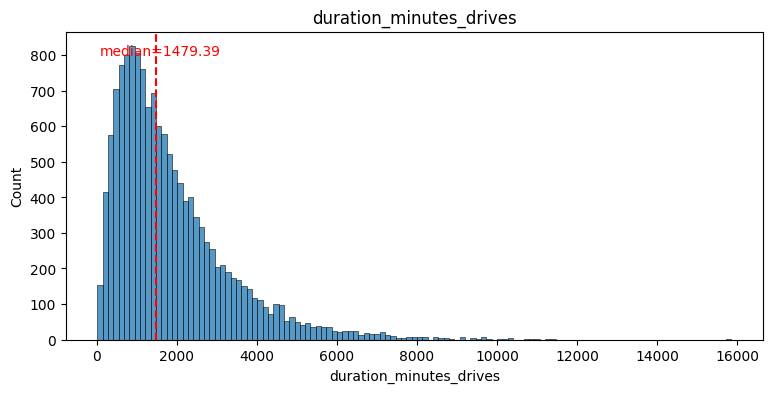

In [23]:
plt.figure(figsize=(9,4))
ax = sns.histplot(x = df['duration_minutes_drives'])
median = df['duration_minutes_drives'].median()
ax.axvline(median, color = 'red', linestyle = '--')
ax.text(75,800, 'median=1479.39', color='red')
plt.title('duration_minutes_drives')
plt.show()

The duration_minutes_drives variable shows a distribution that resembles normality, albeit with a heavily skewed right tail. Approximately half of the users drove for less than ~1,478 minutes (~25 hours), but some users recorded over 250 hours of driving within the month.

- **activity_days**

Number of days the user opens the app during the month

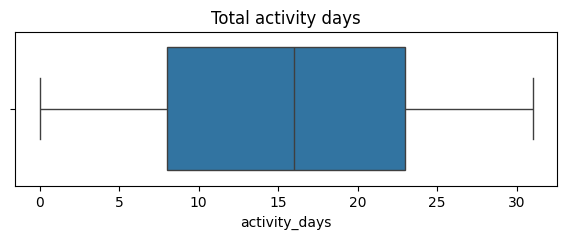

In [24]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['activity_days'])
plt.title('Total activity days')
plt.show()

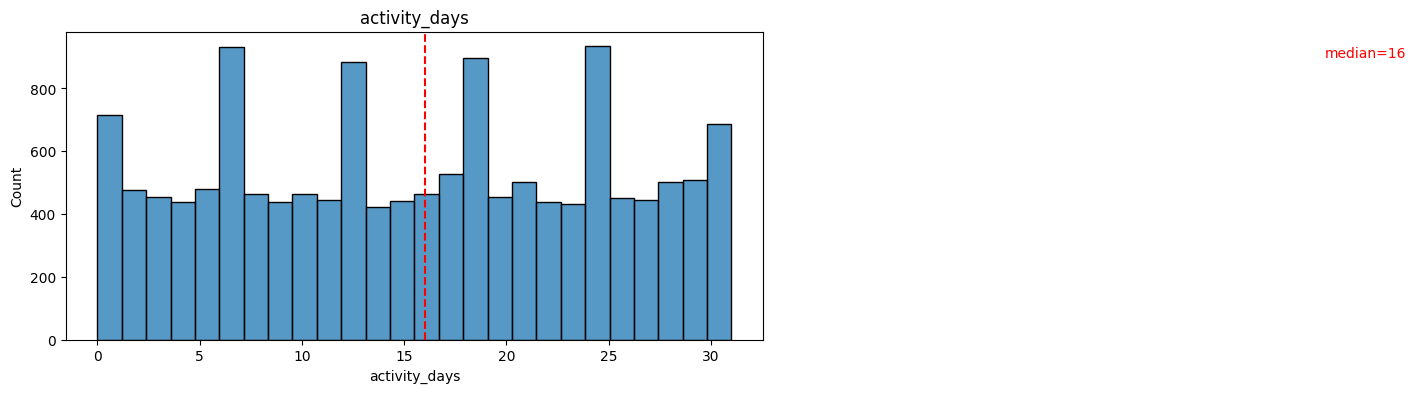

In [25]:
plt.figure(figsize=(9,4))
ax = sns.histplot(x = df['activity_days'])
median = df['activity_days'].median()
ax.axvline(median, color = 'red', linestyle = '--')
ax.text(60,900, 'median=16', color='red')
plt.title('activity_days')
plt.show()


Over the past month, users accessed the app a median of 16 times. The box plot indicates a distribution centered around this median. The histogram depicts an almost uniform distribution, with approximately 500 users opening the app each day. However, there were around 250 users who didn't open the app at all, and more than 500 users who opened it every day of the month.

**- driving_days**

Number of days the user drives (at least 1 km) during the month

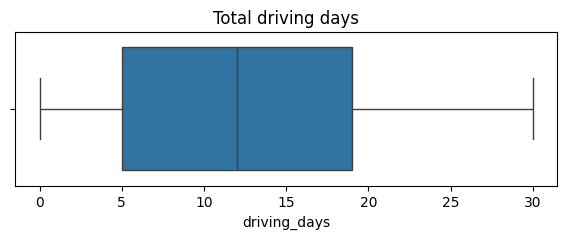

In [26]:
# Box plot
plt.figure(figsize=(7,2))
ax = sns.boxplot(x = df['driving_days'])
plt.title('Total driving days')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

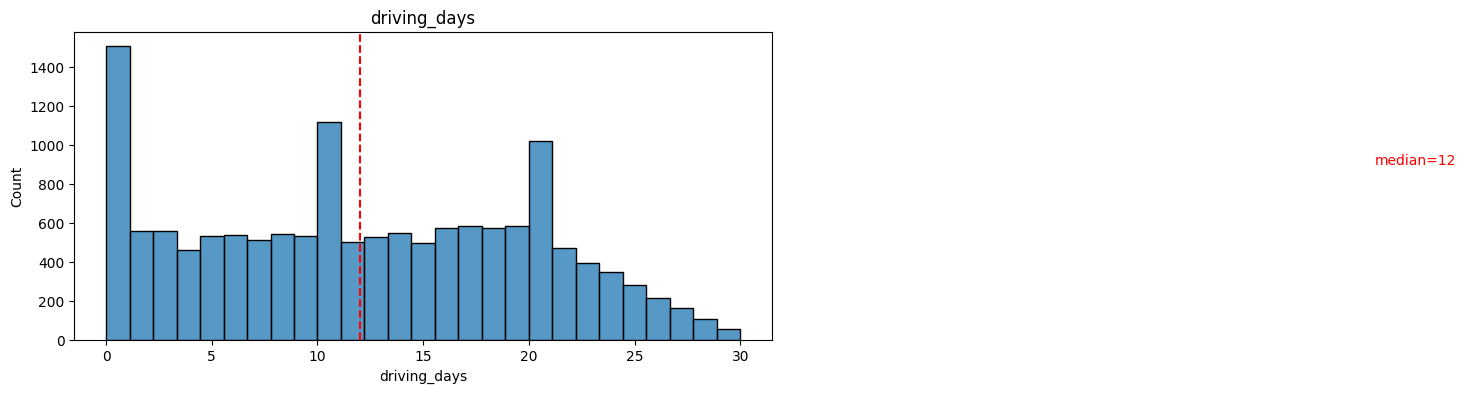

In [27]:
plt.figure(figsize=(9,4))
ax = sns.histplot(x = df['driving_days'])
median = df['driving_days'].median()
ax.axvline(median, color = 'red', linestyle = '--')
ax.text(60,900, 'median=12', color='red')
plt.title('driving_days')
plt.show


The distribution is nearly uniform up to 20 days, after which there is a rapid decline in the number of users who drive a car between 20 and 30 days. The number of users around 500 per day seems to correspond to those who open the app, at least up to 20 days. There were over 1500 users who have never driven a single day of the month, a significantly higher number than those who have never opened the app during the last month.


- device

The type of device a user starts a session with

This is a categorical variable, so you do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart

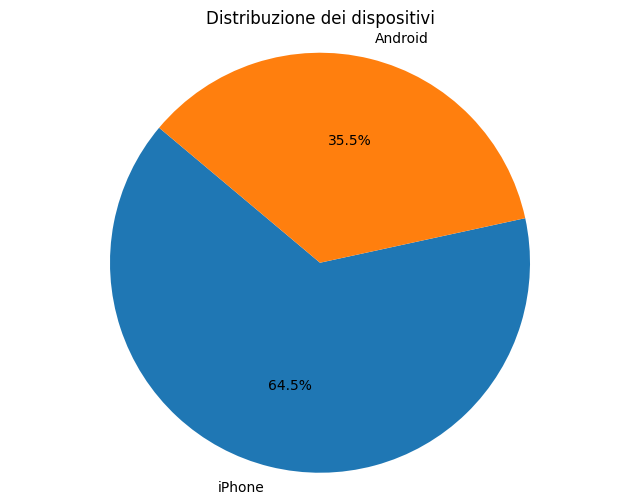

In [28]:
import matplotlib.pyplot as plt


device_counts = df['device'].value_counts()


labels = device_counts.index
sizes = device_counts.values


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione dei dispositivi')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


About two-thirds of all users use an iPhone, while one-third use Android

- label

Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month

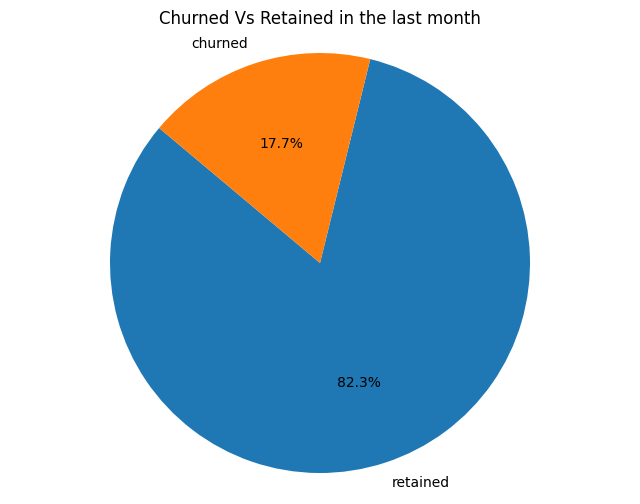

In [29]:
device_counts = df['label'].value_counts()


labels = device_counts.index
sizes = device_counts.values


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Churned Vs Retained in the last month')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The churn rate among users is below 18%

- **driving_days vs. activity_days**

Since both driving_days and activity_days reflect the number of days within a month and are closely interconnected, you can visualize them together on a single histogram. This approach allows for a more comprehensive comparison between the two variables, eliminating the need to toggle between separate histograms.

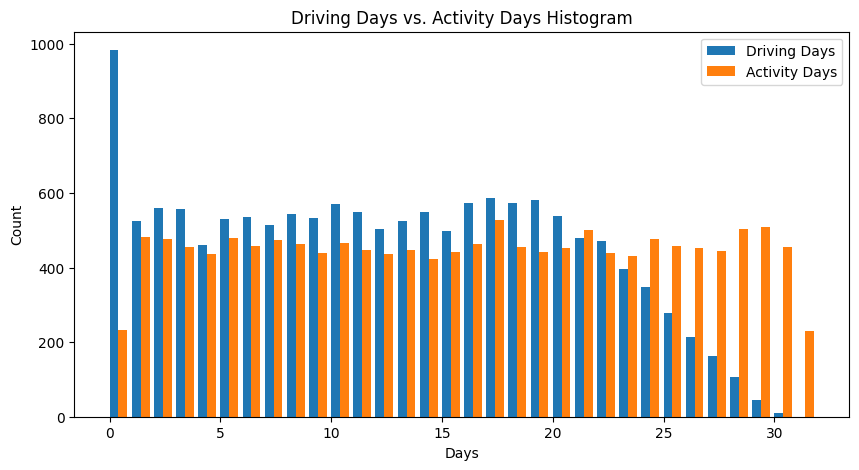

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Data to plot
driving_days = df['driving_days']
activity_days = df['activity_days']

# Create the histogram
plt.figure(figsize=(10, 5))

# Calculate histograms for both columns
hist_driving, bins = np.histogram(driving_days, bins=range(0, 33))
hist_activity, _ = np.histogram(activity_days, bins=range(0, 33))

# Plot separate histograms
plt.bar(bins[:-1], hist_driving, width=0.4, align='edge', label='Driving Days')
plt.bar(bins[:-1] + 0.4, hist_activity, width=0.4, align='edge', label='Activity Days')

# Add labels and title
plt.title('Driving Days vs. Activity Days Histogram')
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()


As commented earlier, there is a stable number of users who open the app and drive, and this number seems consistent up to 20 days per month. Beyond 20 days per month, there is a decrease in the number of users who drive while the number of users who open the app remains stable. This could be due to users checking data or gathering information on availability

**- Retention by device**

Lastly, I will investigate if there is any disparity in the number of users who churned based on their device type

In [52]:
count_by_device = df.groupby(['label','device']).size()
print(count_by_device)
count_by_label = df.groupby(['label']).size()
count_by_label_inpercent = (count_by_label / 14299)

print(count_by_label)
print(count_by_label_inpercent)



label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64
label
churned      2536
retained    11763
dtype: int64
label
churned     0.177355
retained    0.822645
dtype: float64


In [32]:
count_by_device = df.groupby(['label', 'device']).size()
total_by_label = df.groupby('label').size()

count_by_device_in_perc = (count_by_device / total_by_label) * 100
print(count_by_device_in_perc)


label     device 
churned   Android    35.134069
          iPhone     64.865931
retained  Android    35.560656
          iPhone     64.439344
dtype: float64


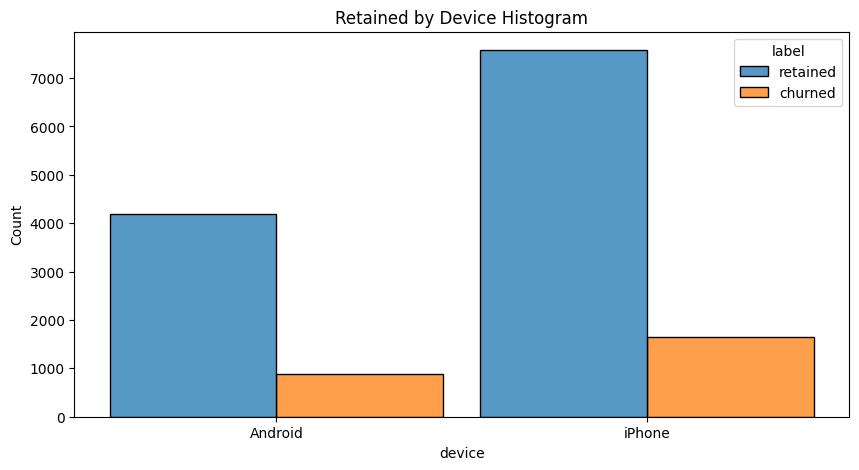

In [33]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x=df['device'], hue=df['label'], multiple='dodge', shrink=0.9)
plt.title('Retained by Device Histogram')
plt.show()




The percentage of iPhone and Android users is very similar among both churned and
retained users; therefore, no significant differences are noticeable.

**Retention by kilometers driven per driving day**

In the previous course, you found that the median distance traveled last month for churned users was 8.33 km, compared to 3.36 km for users who did not churn. Let's delve deeper into this analysis.

To do so, let's create a new column in the DataFrame called 'km_per_driving_day', which calculates the average distance driven per driving day for each user.

Call the describe() method on the new column.

In [34]:
# Create a new column 'km_per_driving_day' in the dataset
# This column calculates the average distance driven per driving day for each user
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

df['km_per_driving_day'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [35]:
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

df['km_per_driving_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

The highest value observed is 15,420 kilometers per driving day. However, this value is physically impossible.

In [36]:
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667



Create a histogram for the new 'km_per_driving_day' column, excluding users with values exceeding 1,200 km

 I am going to generate a histogram using Seaborn's histplot function. It plots the distribution of the 'km_per_driving_day' column, and differentiates between churned and retained users using different colors. The histogram is filled to 100%, showing the proportion of each group within each bin. The x-axis represents the mean distance driven per driving day, and the y-axis represents the percentage of observations within each bin. Finally, the plot is displayed using plt.show()

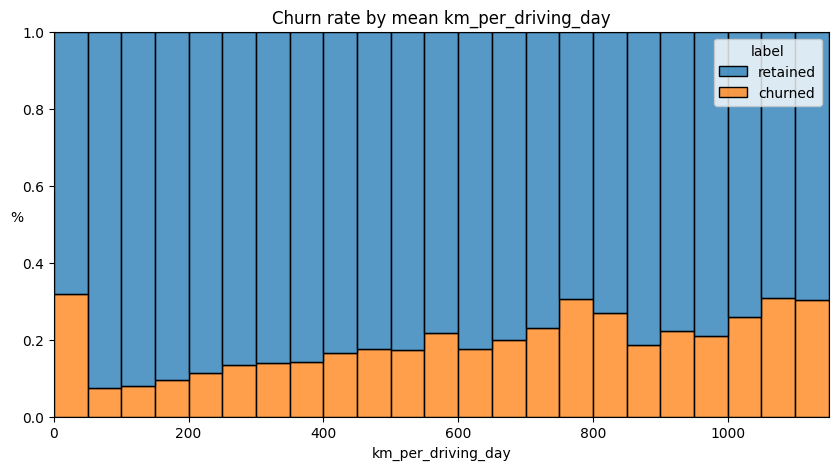

In [37]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(data=df,
             x = 'km_per_driving_day',
             hue = 'label',
             bins = range(0,1200,50),
             multiple='fill')
plt.ylabel('%', rotation = 0)
plt.title('Churn rate by mean km_per_driving_day')
plt.show()

There is a clear correlation between the number of kilometers traveled per day and the churn rate of the service. As the number of kilometers increases, so does the churn rate of the service

**Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

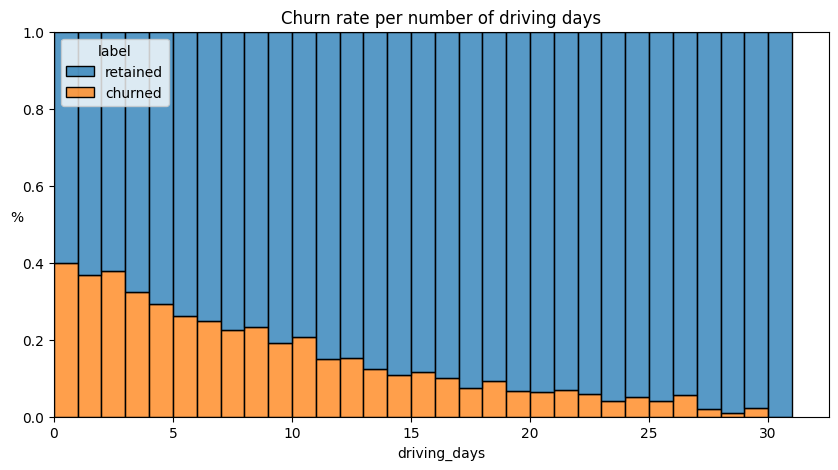

In [38]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(data=df,
             x = 'driving_days',
             hue = 'label',
             bins = range(0,50),
             multiple='fill')
plt.ylabel('%', rotation = 0)
plt.title('Churn rate per number of driving days')
plt.show()

It is evident that those who use the app less have a higher churn rate compared to those who use the app for more days per month. The churn rate for those who use the app few days per month drops from 40% to less than 5% for those who use the app every day.


**Proportion of sessions that occurred in the last month**

Create a new column percent_sessions_in_last_month that represents the percentage of each user's total sessions that were logged in their last month of use.

In [39]:
df['percent_sessions_in_last_month'] = df['sessions']/df['total_sessions']

What is the median value of the new column?

In [40]:
df['percent_sessions_in_last_month'].median()

0.4243102549137284

In [41]:
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266


Now, create a histogram depicting the distribution of values in this new column.

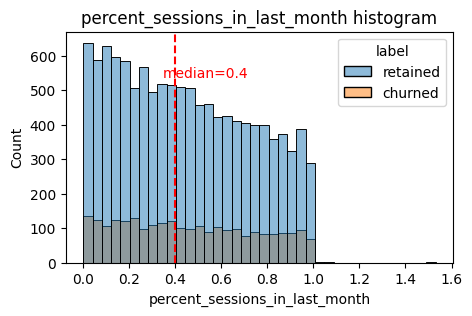

In [42]:

def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha="left", va="top", transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

    # Histogram
histogrammer('percent_sessions_in_last_month',
             hue = df['label'])



Check the median value of the n_days_after_onboarding variable

In [43]:
df['n_days_after_onboarding'].median()

1749.0


Half of the individuals in the dataset experienced 40% or more of their sessions within the last month, despite the median time since onboarding being nearly five years overall

Make a histogram of n_days_after_onboarding for just the people who had 40% or more of their total sessions in the last month.

In [44]:
data = df[df['percent_sessions_in_last_month'] >=0.4]
data

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14986,retained,34,27,36.700250,2676,99,0,4794.851815,3713.682224,19,15,iPhone,319.656788,0.926424
14991,churned,50,41,102.444592,1463,0,121,4094.536313,2201.984210,4,2,iPhone,2047.268157,0.488069
14992,retained,112,90,267.040136,1283,14,0,1525.932143,1116.650478,5,5,iPhone,305.186429,0.419413
14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,182.225002,0.646893


<function matplotlib.pyplot.show(close=None, block=None)>

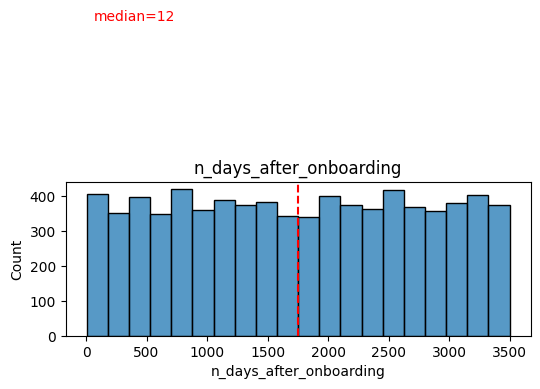

In [45]:
plt.figure(figsize=(6,2))
ax = sns.histplot(x = data['n_days_after_onboarding'])
median = df['n_days_after_onboarding'].median()
ax.axvline(median, color = 'red', linestyle = '--')
ax.text(60,900, 'median=12', color='red')
plt.title('n_days_after_onboarding')
plt.show

The data does not show a particular correlation between the number of sessions in the last month above 40% and the number of days after onboarding. The variable "days after onboarding" does not seem to explain user behavior.

**Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile. such as the 95th percentile of the distribution.

In [46]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
              'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives', "percent_sessions_in_last_month"]:
        threshold = df[column].quantile(0.95)
        df.loc[df[column] > threshold, column] = threshold

In [47]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.448226
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.283954
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.196890
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.424310
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.687251
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,0.936313


**Conclusion**

It is necessary to investigate the reasons behind the massive usage of the app in the last 30 days and to ask the Waza team for possible explanations.

There are no significant differences in the churn rate between Android and Apple users.

The evident inverse correlation between churn rate and number of driving days per month, and the positive correlation between km per driving day and churn rate need to be further investigated.

# Task 4a. Results and evaluation

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

There are missing data in the label column. The variables "sessions" and "drives" have many outliers and therefore may not be representative. On the other hand, the variables "sessions" and "drives" have a strong correlation, so they could be redundant. On average, retained users have fewer drives than churned users.

Who are the users with a high number of rides and why has there been such a strong increase in app usage in the last month? Are they drivers working for some company?

Why do retained users have fewer drives and fewer sessions than churned users?

Who are churned users from a socio-demographic point of view?

# Task 4b. Conclusion

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

Questions:

1 What types of distributions did you notice in the variables? What did this tell you about the data?

2 Was there anything that led you to believe the data was erroneous or problematic in any way?

3 Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

4 - What percentage of users churned and what percentage were retained?

5 - What factors correlated with user churn? How?

6 - Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?

1 - The variables 'session' and 'drives' are strongly correlated with each other, are evidently right-skewed, and present a very high amount of outliers. 'Number of days after onboarding' shows a constant frequency distribution without significant variations. The variable 'driven_km_drives' has a slightly right-skewed normal distribution. The distribution of the variables divides into 3 groups: right-skewed, standard, and homogeneous.

2- Yes, for instance the fact that half of the individuals in the dataset experienced 40% or more of their sessions within the last month, despite the median time since onboarding being nearly five years overall. This is also something we need to address: as the number of kilometers increases, so does the churn rate of the service

3 - This is something to investigate: half of the individuals in the dataset experienced 40% or more of their sessions within the last month, despite the median time since onboarding being nearly five years overall. The evident inverse correlation between churn rate and number of driving days per month, and the positive correlation between km per driving day and churn rate need to be further investigated.

4 - percentage of users churned and what percentage were retained:

label
churned     0.177355
retained    0.822645

5 - The percentage of sessions in the last month seems to be negatively correlated with the customer retention rate. Also, as the number of driving days increases, the abandonment rate of the service decreases, while as the average kilometers per driving day increase, the abandonment rate of the service also increases. There doesn't seem to be a correlation between the type of mobile device and the abandonment rate of the service

6 - The total user tenure, which represents the number of days since onboarding, follows a uniform distribution, with values ranging from nearly zero to approximately 3,500 days, equivalent to around 9.5 years.